In [57]:
from scapy.all import sniff, IP
import json
import requests

# Constants
MY_IP = "10.121.173.160" # Fix this

### Data Vars

Known ips is a list of entries with ip as the key and the value is just whatever infor is sniffed by the API. So the values are dictionaries. 

In [58]:
json.load(open('known_ips.json', 'r'))

{'185.213.80.132': {'city': 'Montréal',
  'region': 'Quebec',
  'country': 'CA',
  'loc': '45.5005,-73.5684',
  'org': 'AS147049 PacketHub S.A.',
  'postal': 'H3B',
  'timezone': 'America/Toronto',
  'readme': 'https://ipinfo.io/missingauth',
  'times_seen_count': 1533},
 '37.120.154.211': {'city': 'Tokyo',
  'region': 'Tokyo',
  'country': 'JP',
  'loc': '35.6769,139.7714',
  'org': 'AS9009 M247 Europe SRL',
  'postal': '104-0031',
  'timezone': 'Asia/Tokyo',
  'readme': 'https://ipinfo.io/missingauth',
  'times_seen_count': 303},
 '211.197.11.14': {'city': 'Seoul',
  'region': 'Seoul',
  'country': 'KR',
  'loc': '37.5660,126.9784',
  'org': 'AS4766 Korea Telecom',
  'postal': '03141',
  'timezone': 'Asia/Seoul',
  'readme': 'https://ipinfo.io/missingauth',
  'times_seen_count': 1419}}

In [59]:
with open("test.json","w") as f:
    json_string = json.dumps({
        "a":"1",
        "b":"2"
        }, indent=4
    )
    f.write(json_string)


In [60]:
json.load(open("test.json",'r'))

{'a': '1', 'b': '2'}

In [61]:
# Load known ips database, includes times_seen_count field
known_ips = json.load(open('known_ips.json', 'r'))
known_ips

{'185.213.80.132': {'city': 'Montréal',
  'region': 'Quebec',
  'country': 'CA',
  'loc': '45.5005,-73.5684',
  'org': 'AS147049 PacketHub S.A.',
  'postal': 'H3B',
  'timezone': 'America/Toronto',
  'readme': 'https://ipinfo.io/missingauth',
  'times_seen_count': 1533},
 '37.120.154.211': {'city': 'Tokyo',
  'region': 'Tokyo',
  'country': 'JP',
  'loc': '35.6769,139.7714',
  'org': 'AS9009 M247 Europe SRL',
  'postal': '104-0031',
  'timezone': 'Asia/Tokyo',
  'readme': 'https://ipinfo.io/missingauth',
  'times_seen_count': 303},
 '211.197.11.14': {'city': 'Seoul',
  'region': 'Seoul',
  'country': 'KR',
  'loc': '37.5660,126.9784',
  'org': 'AS4766 Korea Telecom',
  'postal': '03141',
  'timezone': 'Asia/Seoul',
  'readme': 'https://ipinfo.io/missingauth',
  'times_seen_count': 1419}}

In [62]:
def write_known_ips(known_ips:dict):
    """Over-write known ips to known_ips.json"""
    json_string = json.dumps(known_ips, indent=4)
    with open('known_ips.json','w') as f:
        f.write(json_string)
    return
def update_known_ips(ip_addr:str, ip_info:dict, known_ips:dict):
    """Update known_ips data, return updated data 
    (also modified inplace but intended to be used
    as pure function to re-define known_ips)"""
    # If the IP is known, increment it's count by 1
    try:
        #print(f"ip_addr : {ip_addr}")
        if ip_addr in known_ips:
            known_ips[ip_addr]["times_seen_count"] += 1
        else:
            ip_info_mod = ip_info.copy()
            ip_info_mod.pop("ip")
            ip_info_mod["times_seen_count"] = 1
            known_ips[ip_addr] = ip_info_mod
    except Exception as e:
        print(f"Exception caught {e}")
    return known_ips

In [63]:
def get_geoip_info(ip:str):
    """Get response from ipinfo.io"""
    response = requests.get(f"https://ipinfo.io/{ip}/json")
    if response.status_code == 200:
        return response.json()
    else:
        return {} # Why would it not be? Think and deal more appropriately

In [66]:
def packet_callback(packet, known_ips):
    """Get info from ip packet, add it to database"""
    if IP in packet: # Check if packet is an IP packet
        ip_src = packet[IP].src # Source IP address
        ip_dst = packet[IP].dst # Destination IP address
        if str(ip_src) == MY_IP: # Don't care about packets sent
            return
        # If the ip is unknown, ping the API to find out about it
        if str(ip_src) not in known_ips:
            print(f"\nif {ip_src} not in known_ips")
            geo_ip_info = get_geoip_info(ip_src)
        else: # No need to ping the API if we already know it
            print(f"\nelse {ip_src} in known_ips")
            geo_ip_info = known_ips[ip_src] 
        known_ips = update_known_ips(ip_src, geo_ip_info, known_ips) # update known ips with data
        write_known_ips(known_ips)
        print("known_ips.json written")
        # TODO: conditionally call script to change RPi's mac address or ip address when 
        # run out of ip pings
        return 
    
# Run the Daemon
sniff(
    prn=lambda packet: packet_callback(packet, known_ips),
    filter="ip",
    store=0
)


else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written

else 211.197.11.14 in known_ips
Ping
known_ips.json written


<Sniffed: TCP:0 UDP:0 ICMP:0 Other:0>

# Build The Map
I think we can do this in js instead... 

In [27]:
!pip install cartopy

In [49]:
country_count

{'Unknown': 24, 'US': 291, 'CA': 18}

# playground

In [28]:
for i in countries.kwargs:
    print(i)

facecolor


In [29]:
cfeature.COLORS

{'land': array([0.9375  , 0.9375  , 0.859375]),
 'land_alt1': array([0.859375, 0.859375, 0.859375]),
 'water': array([0.59375   , 0.71484375, 0.8828125 ])}

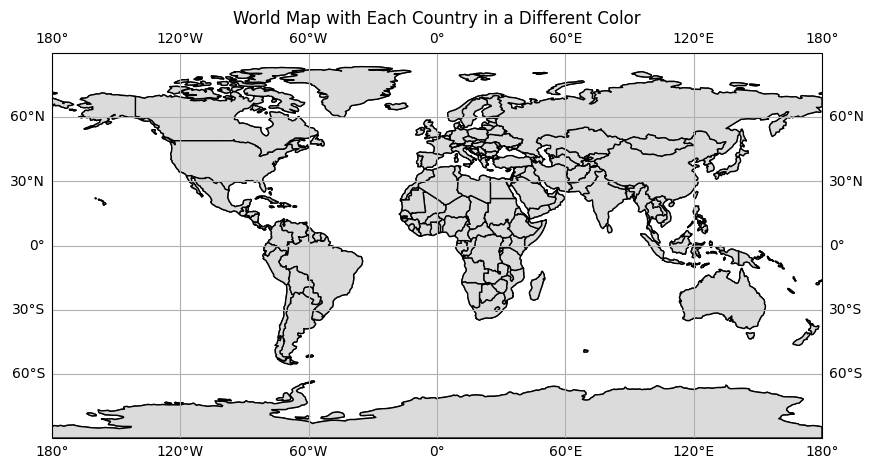

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot with the PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Add countries with unique colors
countries = cfeature.NaturalEarthFeature(category='cultural',
                                         name='admin_0_countries',
                                         scale='110m',
                                         facecolor=cfeature.COLORS['land_alt1'])
ax.add_feature(countries, edgecolor='black')

# Set the extent to show the whole world
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title('World Map with Each Country in a Different Color')
plt.show()


In [30]:
!pip install geopandas

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

/var/folders/25/p7w3csj93c5cz89r8vd6tyjw0000gn/T/ipykernel_37244/3071876591.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


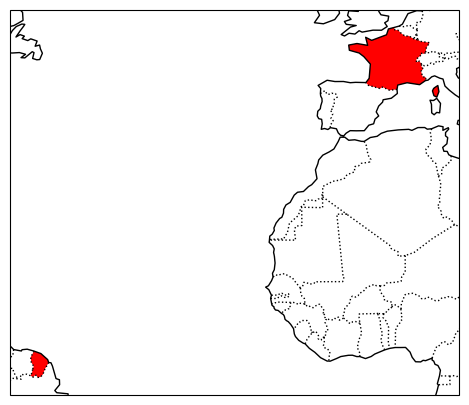

In [32]:

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
# world.except_on(ax)  # Draw all countries

# Color France in red
france = world[world.name == 'France']
france.plot(ax=ax, color='red')

# Add features for context
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

plt.show()
